# Pymaceuticals Inc.
---

### Analysis

In this data set composed of 249 mice, 2 different drug regimens were tested to determine which anti-cancer medications were most effective in treating squamous cell carcinoma (SCC). SCC is a commonly occurring form of skin cancer. 

249 mice met the criteria of having SCC related tumors. The study was composed of 49.4% female mice and 50.6% male. Over 45 days, the tumors were observed and measured. The goal of the study was to understand the performance of Pymaceutical’s primary drug of interest, Capomulin by comparing it to 9 other treatment regimens. 

In the chart below entitled, "Total Number of Rows for Each Drug Regimen" the number of mice on each medication is shown.

4 treatment regimens were the primary focus: Capomulin, Ramicane, Infubinol, and Ceftamin. After looking through the data and analyzing for possible outliers, 36.32 were found. 

The Capomulin regimen does show a lower mean tumor volume, suggesting it's effectiveness. 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#single data frame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data.to_csv("data/combined_data.csv", index=False)

# Display the data table for preview
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [3]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()

print("Number of mice:", num_mice)

Number of mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

#print
print("Duplicate mice by ID number:", duplicate_mouse_ids)


Duplicate mice by ID number: ['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

print("Data for duplicate mouse IDs:")
print(duplicate_mouse_data)

Data for duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  
cleaned_data = combined_data.drop_duplicates(subset='Mouse ID', keep='first')

print("Cleaned data without duplicate Mouse IDs:")
print(cleaned_data)

Cleaned data without duplicate Mouse IDs:
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0            

In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice = cleaned_data['Mouse ID'].nunique()

print("Number of mice:", num_mice)

Number of mice: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Assemble the resulting series into a single summary DataFrame.
print("Summary Statistics Table:")
print(summary_stats)


Summary Statistics Table:
                   Mean     Median   Variance  Std Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.322552  50.854632  42.351070       6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

print(summary_stats)


                   std       sem     median       mean        var
Drug Regimen                                                     
Capomulin     4.994774  0.329346  41.557809  40.675741  24.947764
Ceftamin      6.268188  0.469821  51.776157  52.591172  39.290177
Infubinol     6.567243  0.492236  51.820584  52.884795  43.128684
Ketapril      8.279709  0.603860  53.698743  55.235638  68.553577
Naftisol      8.134708  0.596466  52.509285  54.331565  66.173479
Placebo       7.821003  0.581331  52.288934  54.033581  61.168083
Propriva      6.507770  0.512884  50.854632  52.322552  42.351070
Ramicane      4.846308  0.320955  40.673236  40.216745  23.486704
Stelasyn      7.710419  0.573111  52.431737  54.233149  59.450562
Zoniferol     6.966589  0.516398  51.818479  53.236507  48.533355


## Bar and Pie Charts

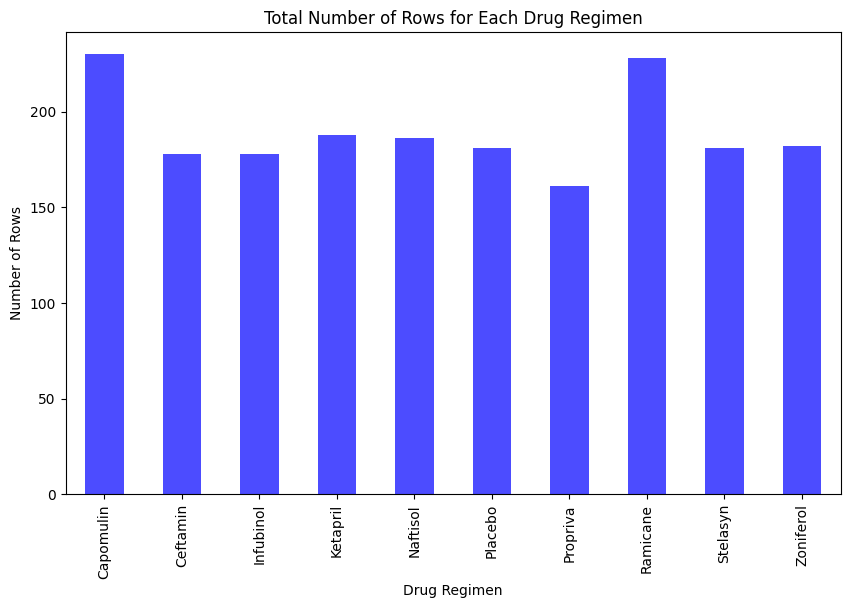

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = combined_data.groupby('Drug Regimen').size()

regimen_counts.plot(kind='bar', color='blue', alpha=0.7, figsize=(10, 6))

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()

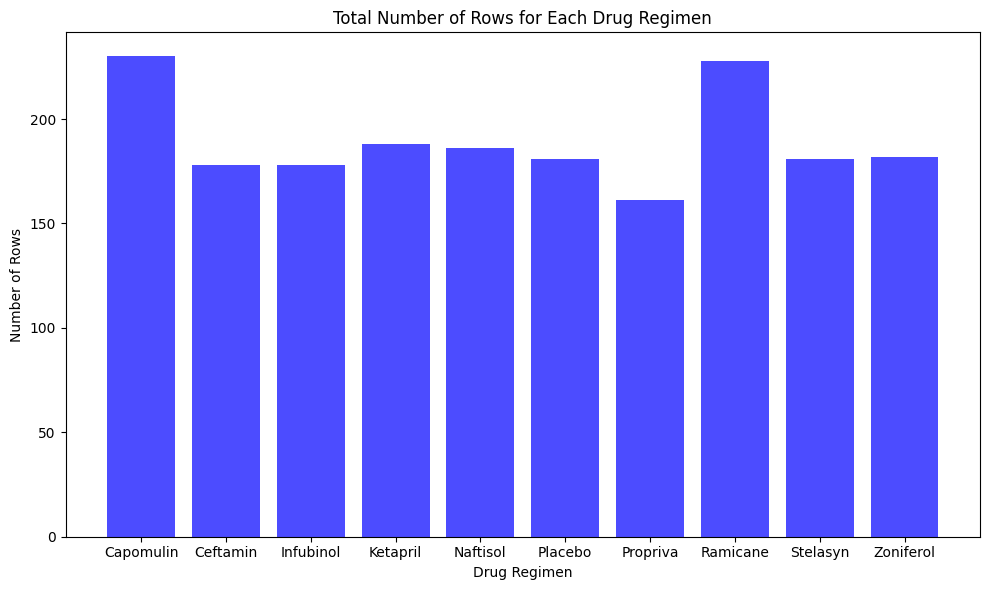

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = combined_data.groupby('Drug Regimen').size()

regimens = regimen_counts.index
counts = regimen_counts.values

plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='blue', alpha=0.7)

plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')


plt.tight_layout()
plt.show()


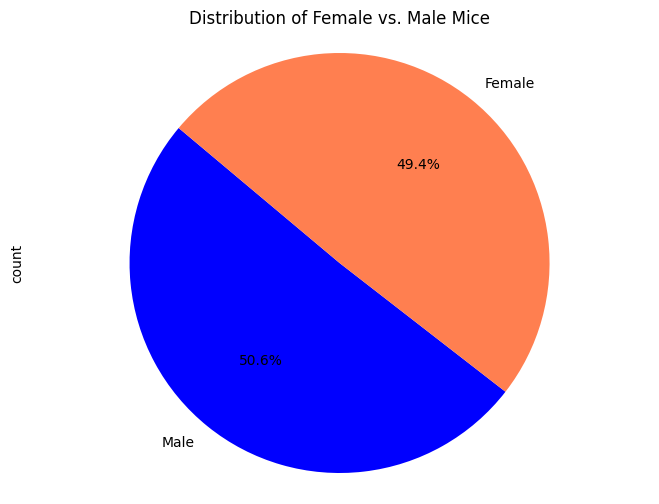

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#counting boys vs girls
sex_counts = combined_data['Sex'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'coral'], startangle=140, figsize=(8, 6))

plt.title('Distribution of Female vs. Male Mice')

plt.axis('equal')


plt.show()


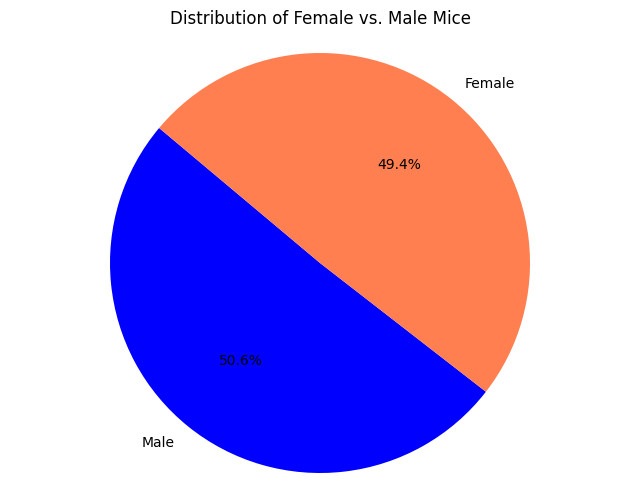

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['blue', 'coral'], startangle=140)

plt.title('Distribution of Female vs. Male Mice')

plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = combined_data[combined_data['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this information with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, combined_data, on=['Mouse ID', 'Timepoint'], how='inner')

print(final_tumor_volume)


   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [15]:
tumor_volume_data = []
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_dict = {}
tumor_volume_subset_dict = {}

# empty list to store potential outliers
potential_outliers = []

for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    tumor_volume_dict[treatment] = treatment_data.values
    
    # Subset of tumor volume data 
    subset = treatment_data.head(5)
    
    tumor_volume_subset_dict[treatment] = subset.values

    Q1 = np.percentile(treatment_data, 25)
    Q3 = np.percentile(treatment_data, 75)
    
    # Calculate the IQR for the current treatment regimen
    IQR = Q3 - Q1
    
# Determine outliers using upper and lower bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]     
    
    #potential outliers
    potential_outliers.extend(outliers)

# Print potential outliers
print("Potential outliers:")
print(potential_outliers)


Potential outliers:
[36.3213458]


C:\Users\Karin\AppData\Local\Temp\ipykernel_8176\4270321290.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_data, labels=treatments)


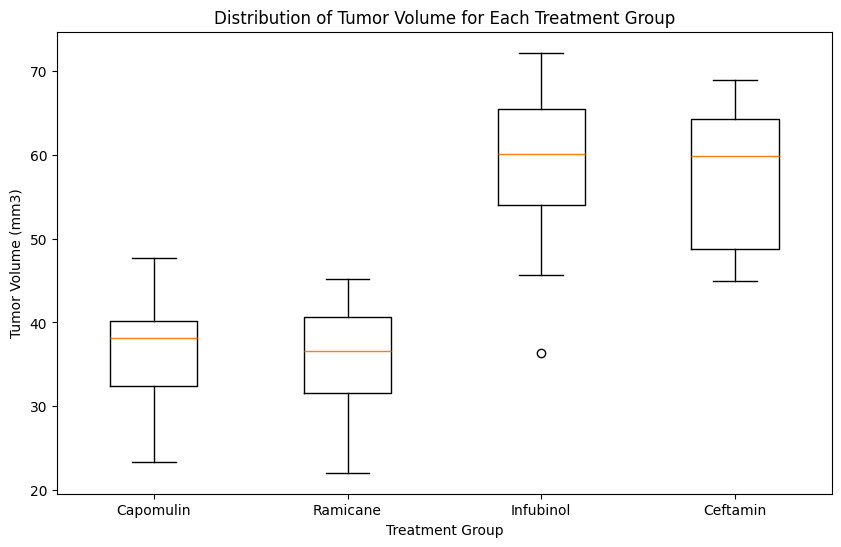

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values for treatment in treatments]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments)

plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()


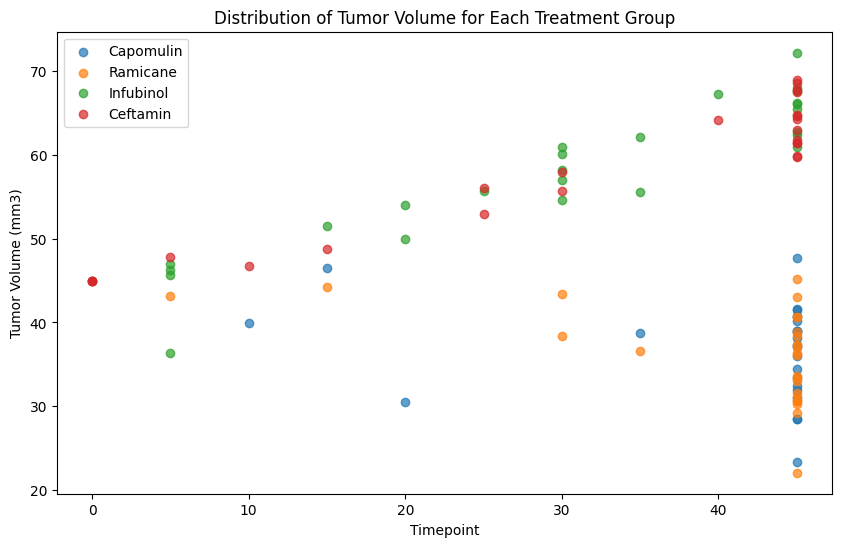

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment] for treatment in treatments]


plt.figure(figsize=(10, 6))
for i, treatment_data in enumerate(tumor_volume_data):
    plt.scatter(treatment_data['Timepoint'], treatment_data['Tumor Volume (mm3)'], label=treatments[i], alpha=0.7)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.legend()

plt.show()

C:\Users\Karin\AppData\Local\Temp\ipykernel_8176\2233015847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capomulin_data['Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')


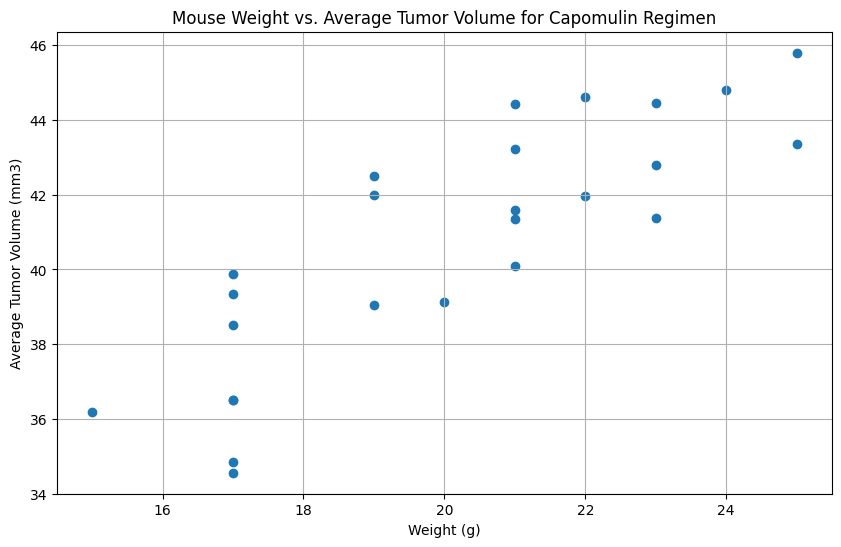

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']

# Ensure the 'Tumor Volume (mm3)' column is numeric
capomulin_data['Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')

# Group by Mouse ID and calculate the average tumor volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with the mouse weight data
mouse_weight = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates().set_index('Mouse ID')
merged_data = mouse_weight.join(avg_tumor_volume, how='inner')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Adding titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()



## Correlation and Regression

Correlation Coefficient: 0.841936342469472


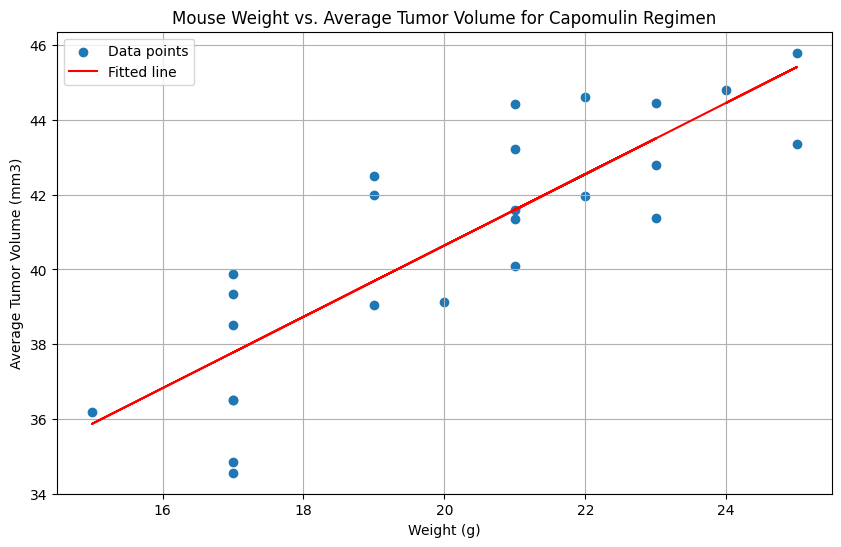

Slope: 0.9544396890241048
Intercept: 21.552160532685008
R-squared: 0.7088568047708724
P-value: 1.3225722434712287e-07
Standard Error: 0.12754359033201318


In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import numpy as np
from scipy.stats import linregress

correlation_coefficient = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])


plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], label='Data points')
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], 'r', label='Fitted line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()

#results printed
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

